In [5]:
from IPython.display import Image

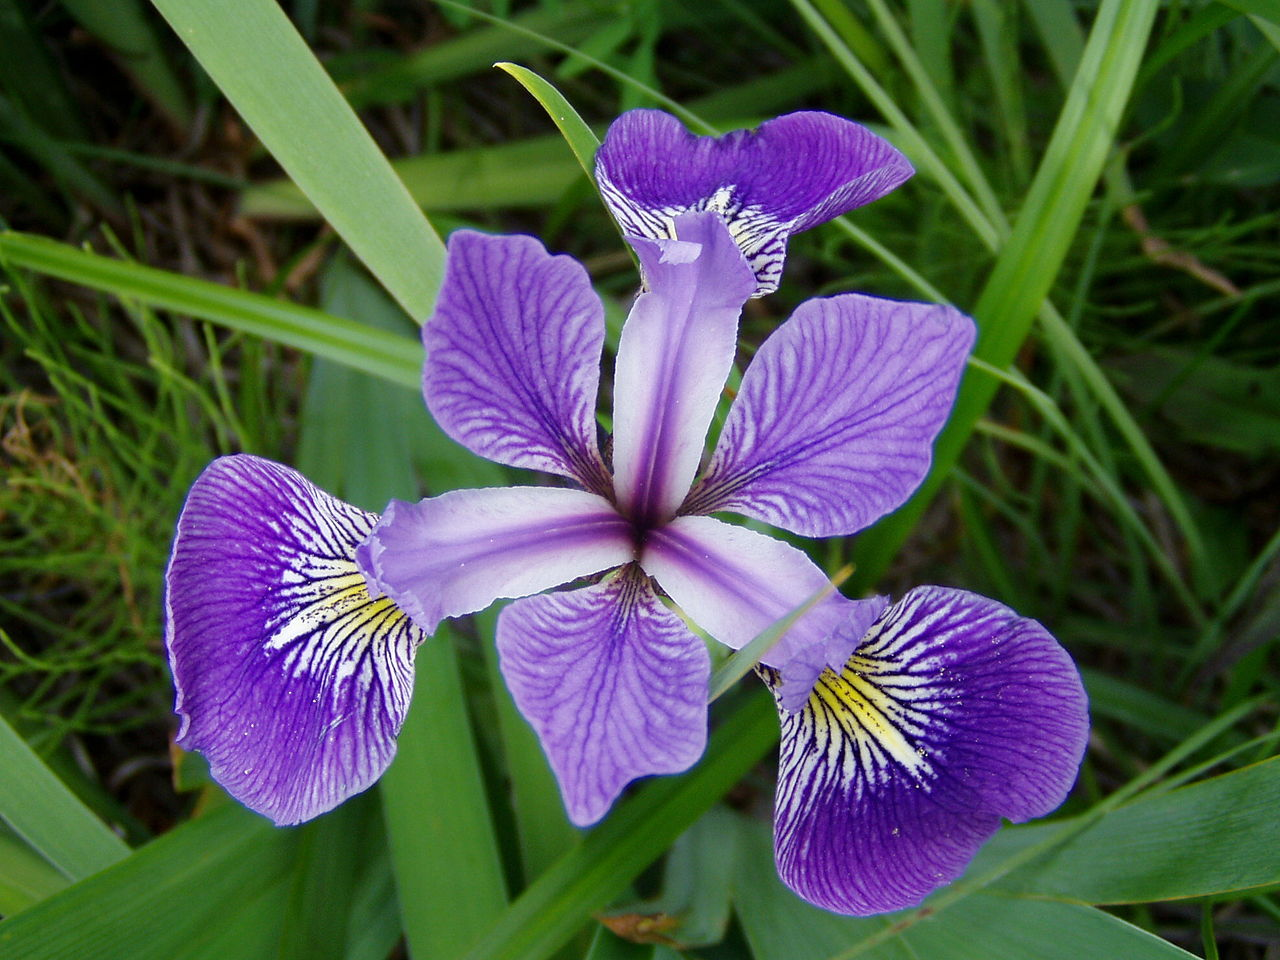

In [10]:
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Iris_versicolor_3.jpg/1280px-Iris_versicolor_3.jpg'
Image(url, width=300, height=300)

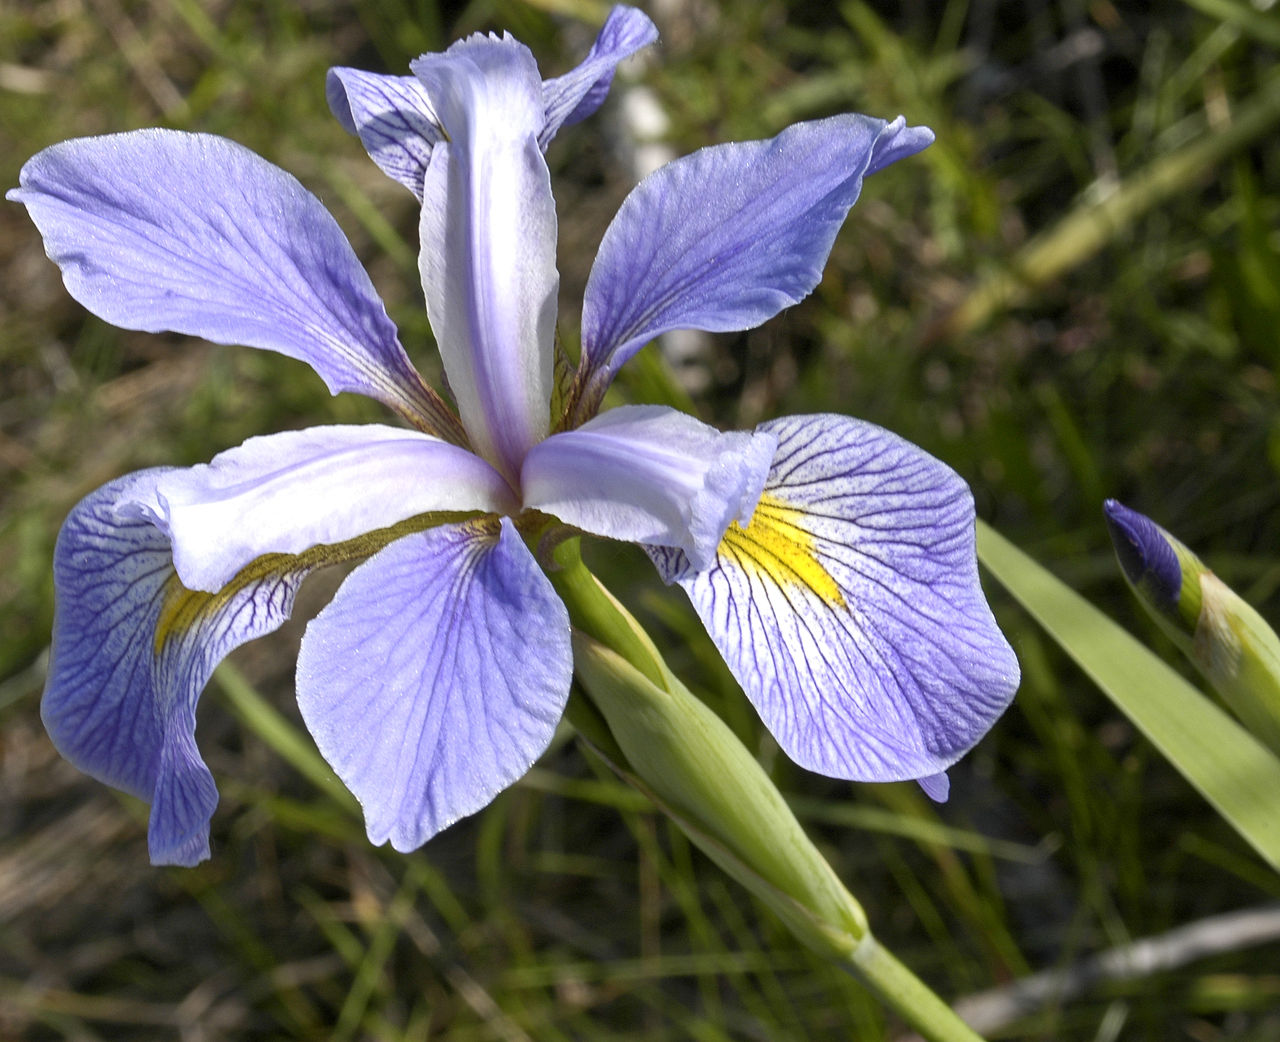

In [11]:
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/1280px-Iris_virginica.jpg'
Image(url, width=300, height=300)

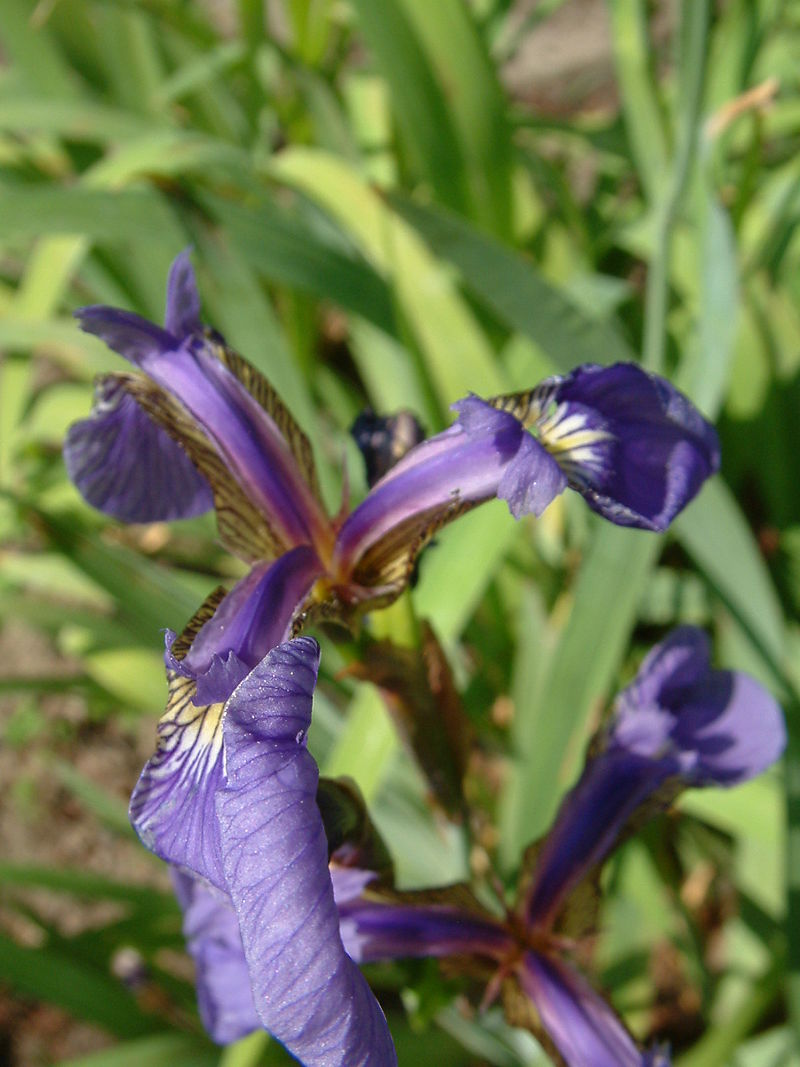

In [12]:
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg/800px-Kosaciec_szczecinkowaty_Iris_setosa.jpg'
Image(url, width=300, height=300)

In [ ]:
-------------------------------------------------------------------------------

In [15]:
import numpy as np
import pandas as pd
from pandas import Series

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [16]:
from sklearn import linear_model
from sklearn.datasets import load_iris

In [17]:
iris = load_iris()

In [18]:
X = iris.data

In [20]:
Y = iris.target

In [22]:
# print(iris.DESCR)

In [23]:
iris_data = pd.DataFrame(X,columns=['sepal_length','sepal_width','petal_length','petal_width'])

In [25]:
iris_target = pd.DataFrame(Y,columns=['species'])

In [26]:
# iris_target.head()
# iris_target.tail()

In [28]:
def flor(num):
    if num == 0:
        return 'setosa'
    elif num == 1:
        return 'versicolour'
    else:
        return 'virginica'

In [29]:
iris_target['species'] = iris_target['species'].apply(flor)

In [31]:
iris_target
# iris_target.head()
# iris_target.tail()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [32]:
iris = pd.concat([iris_data,iris_target],axis=1)

In [33]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


C:\Users\Zng\anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


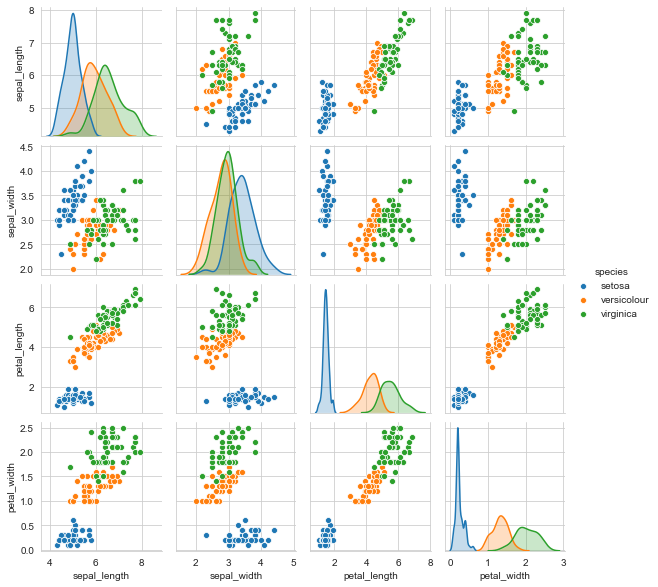

In [37]:
sns.pairplot(iris,hue='species', size=2)

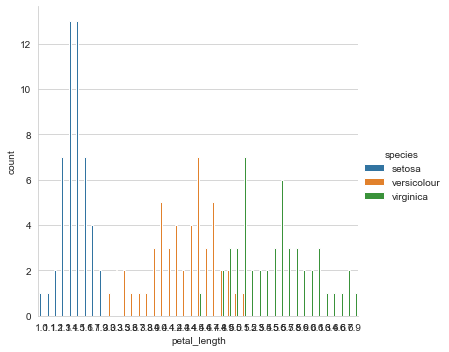

In [52]:
sns.catplot('petal_length', kind="count",hue='species', data=iris)

In [ ]:
-------------------------------------------------------------------------------

In [ ]:
# BUILDING A LOGISTIC REGRESSION - MODELAGEM DE DADOS

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [69]:
log_reg = LogisticRegression()

In [70]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.4, random_state=3)

In [71]:
log_reg = LogisticRegression().fit(X_train,Y_train)
# log_reg.fit(X_train,Y_train)

C:\Users\Zng\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# METRICS ACCURACY - PRECISÂO DOS DADOS

In [72]:
from sklearn import metrics
Y_predict = log_reg.predict(X_test)

In [81]:
print(metrics.accuracy_score(Y_test,Y_predict))

0.9666666666666667


In [83]:
metrics.accuracy_score(Y_test,Y_predict)

0.9666666666666667

In [ ]:
# EVALUATION - AVALIAÇÂO

In [108]:
from sklearn.metrics import classification_report

In [109]:
from sklearn.metrics import confusion_matrix

In [110]:
print(classification_report(Y_test,Y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      0.90      0.95        20
           2       0.90      1.00      0.95        18

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.96        60
weighted avg       0.97      0.97      0.97        60



In [111]:
print(confusion_matrix(Y_test,Y_predict))

[[22  0  0]
 [ 0 18  2]
 [ 0  0 18]]


In [ ]:
-------------------------------------------------------------------------------

In [ ]:
# KNeighborsClassifier

In [85]:
from sklearn.neighbors import KNeighborsClassifier

In [86]:
knn = KNeighborsClassifier(n_neighbors=6)

In [87]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=6)

In [88]:
Y_pred = knn.predict(X_test)

In [89]:
print(metrics.accuracy_score(Y_test,Y_pred))

0.95


In [ ]:
# GRAPH ACCURARY VS K VALUES

In [99]:
k_range = range(1,21)

# TypeError: 'type' object is not subscriptable []

accuracy = []

In [100]:
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    Y_pred = knn.predict(X_test)
    
    accuracy.append(metrics.accuracy_score(Y_test,Y_pred))

Text(0, 0.5, 'teste de precisao_accuracy')

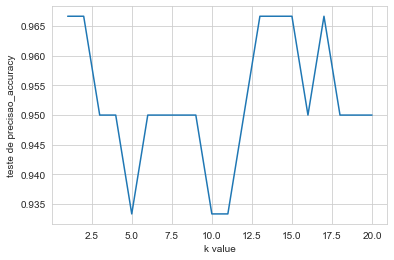

In [101]:
plt.plot(k_range,accuracy)
plt.xlabel('k value')
plt.ylabel('teste de precisao_accuracy')

In [ ]:
# Choosing a K Value

In [116]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    Y_pred = knn.predict(X_test)
    error_rate.append(np.mean(Y_pred != Y_test))

Text(0, 0.5, 'Error Rate')

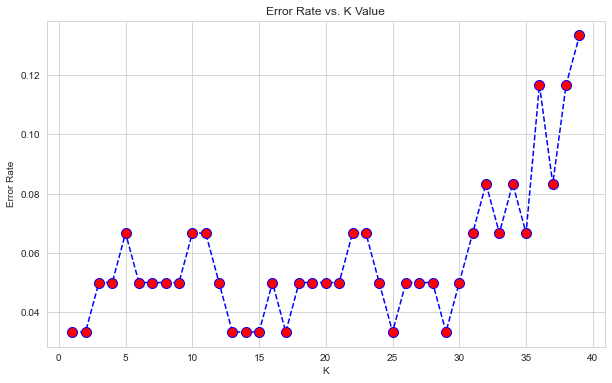

In [117]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [113]:
# COM K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(Y_test,Y_pred))
print('\n')
print(classification_report(Y_test,Y_pred))

WITH K=1


[[22  0  0]
 [ 0 18  2]
 [ 0  0 18]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      0.90      0.95        20
           2       0.90      1.00      0.95        18

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.96        60
weighted avg       0.97      0.97      0.97        60



In [114]:
# COM K=23
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(Y_test,Y_pred))
print('\n')
print(classification_report(Y_test,Y_pred))

WITH K=1


[[22  0  0]
 [ 0 18  2]
 [ 0  2 16]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       0.90      0.90      0.90        20
           2       0.89      0.89      0.89        18

    accuracy                           0.93        60
   macro avg       0.93      0.93      0.93        60
weighted avg       0.93      0.93      0.93        60

